In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.impute as im

In [44]:
df = pd.read_csv('./model_data.csv')

new_df = pd.DataFrame({
    'Sentiment_Polarity': df['Sentiment_Polarity'],
    'Sentiment_Subjectivity': df['Sentiment_Subjectivity'],
    'Rating': df['Rating']
})

imputer = im.SimpleImputer(missing_values=pd.NA, strategy='mean')
imputer = imputer.fit(new_df)
imputed_df = imputer.transform(new_df.values)

spolar = imputed_df[:, 0]
subj = imputed_df[:, 1]
rat = imputed_df[:, 2]

df['Sentiment_Polarity'] = spolar
df['Sentiment_Subjectivity'] = subj
df['Rating'] = rat

df = df.dropna()
df

# imputed_df = imputed_df.sample(frac=1).reset_index(drop=True)
# df = df.dropna()

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Rating
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,4.0
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462,4.0
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000,4.0
3,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000,4.0
4,10 Best Foods for You,Best way,Positive,1.000000,0.300000,4.0
...,...,...,...,...,...,...
37422,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667,4.1
37423,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222,4.1
37424,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000,4.1
37425,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000,4.1


(array([2486.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   31.,
          65.,    0.,    0.,   63.,  120.,   39.,   64.,  240.,  300.,
         216.,  563.,  766., 1341., 3453., 2799., 3703., 4914., 4948.,
        4547., 4204., 2212.,  313.,   40.]),
 array([0.   , 0.098, 0.196, 0.294, 0.392, 0.49 , 0.588, 0.686, 0.784,
        0.882, 0.98 , 1.078, 1.176, 1.274, 1.372, 1.47 , 1.568, 1.666,
        1.764, 1.862, 1.96 , 2.058, 2.156, 2.254, 2.352, 2.45 , 2.548,
        2.646, 2.744, 2.842, 2.94 , 3.038, 3.136, 3.234, 3.332, 3.43 ,
        3.528, 3.626, 3.724, 3.822, 3.92 , 4.018, 4.116, 4.214, 4.312,
        4.41 , 4.508, 4.606, 4.704, 4.802, 4.9  ]),
 <BarContainer object of 50 artists>)

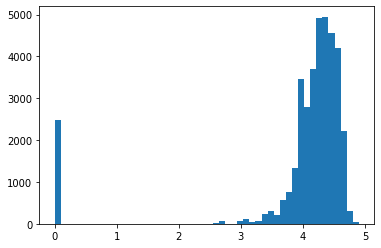

In [46]:
ratings = np.array(list(df['Rating']))

# enc_ratings = []
# encoder = np.array([0, 1, 2, 3, 4, 5])
# for i in range(len(ratings)):
#     rating = ratings[i]

#     enc_ratings.append((encoder == rating) * 1)

applen = []
app_names = list(df['App'])
for i in range(len(app_names)):
    length = len(app_names[i].split(' '))

    applen.append(length)

max_applen = np.max(applen)
applen = np.array(applen)/max_applen

wordlen = []
revs = list(df['Translated_Review'])
for i in range(len(revs)):
    length = len(revs[i].split(' '))

    wordlen.append(length)

max_wordlen = np.max(wordlen)
wordlen = np.array(wordlen)/max_wordlen

sentiment = ((np.array(list(df['Sentiment'])) == "Positive") * 1) + ((np.array(list(df['Sentiment'])) == "Negative") * 1 * -1)
spolarity = list(df['Sentiment_Polarity'])
subjectivity = list(df['Sentiment_Subjectivity'])
plt.hist(ratings, bins=50)

In [47]:
df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Rating
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,4.0
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462,4.0
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000,4.0
3,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000,4.0
4,10 Best Foods for You,Best way,Positive,1.000000,0.300000,4.0
...,...,...,...,...,...,...
37422,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667,4.1
37423,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222,4.1
37424,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000,4.1
37425,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000,4.1


In [5]:
df.to_csv('./tmdata.csv')